## Script to combine FeatureIdx with results of Image analysis

####  1 Setup

 1.1 Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import os
from AlignFeatureFunctions import createRowCol,mergeByRowCol,rotTopoMap,vizFeatureIdxOnChip

#### 2 Load and verify the data

2.1 load the "Image.csv" data and save it in the "rawImagedata" variable

In [2]:
pathToImageObject="Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/DataAnalysis/"        # put the directory between the ""
locationOfImageObject=pathToImageObject+"TotalImageObject_txt"
# check if file exists
if os.path.isfile(locationOfImageObject):
    rawImagedata=pd.read_csv(locationOfImageObject,sep="\t",low_memory=False)
else:
    print("File not found, check if you finished the image cropping")


In [3]:
locationOfImageObject

'Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/DataAnalysis/TotalImageObject_txt'

2.2 Check how many rows and columns data contains

In [4]:
rawImagedata.shape

(43560, 5563)

2.3 Check if all the necessary columns are present

In [5]:
columnsRequired=['FileName_CellBody','Metadata_row','Metadata_col','Metadata_Well']
columnsPresent=all([columnNames in rawImagedata.columns for columnNames in columnsRequired])
if columnsPresent:
    print('All required columns are present')
else:
    print([x for x in columnsRequired if x not in rawImagedata.columns],'are not present (Metadata_Row and Metadata_Col need to be estimated from Metadata_Well)')    

All required columns are present


2.4 Check if Row Col coordinates exists per image, or estimate it from the Well

In [6]:
rawImagedata=createRowCol(rawImagedata)

Metadata_Well exists
Metadata_row exists
Metadata_col exists


#### 3. Connect the imaging data with TopoChip Map data file

3.1 load the topomap data file, that links FeatureIdx and Row Col

In [7]:
#load TopoChip Map data file, the filepathe that preceed the screen project folder
#is taken from "path_to_data" defined in the settings

topomap_file=os.getcwd()+"/AnnotationFiles/TopoMap.csv"
#load the data
topochipMap=pd.read_csv(topomap_file,sep=";",header=None)

##### 3.2 Rotating  the Topo map if necessary

In [8]:
rotationNeeded=input("Do you need to rotate the TopoMap: YES/NO")

Do you need to rotate the TopoMap: YES/NONO


In [9]:
rotationNeeded=rotationNeeded.upper()
if rotationNeeded=='YES':
    rotation=input('Which rotation coefficient: 1 (-90degrees),2 (-180degrees),-1 (+90degrees),-2 (+180degrees) ')
    rotation=int(rotation)
    topochipMap_rot=rotTopoMap(topochipMap=topochipMap,rotation_coefficient=rotation)#applying function to the 
if rotationNeeded=='NO':
    topochipMap=topochipMap

3.4 Combine TopoChip map function with data from the screen

In [10]:
#apply function rawImagedata_m to rawImagedata data and save results as rawImagedata_m
if rotationNeeded=='YES':
    rawImagedataWithFI=mergeByRowCol(topochipMap=topochipMap_rot,Imagedata=rawImagedata)
if rotationNeeded=='NO':
    rawImagedataWithFI=mergeByRowCol(topochipMap=topochipMap,Imagedata=rawImagedata)


3.3 Check and compare the original topo map and rotated

no rotation


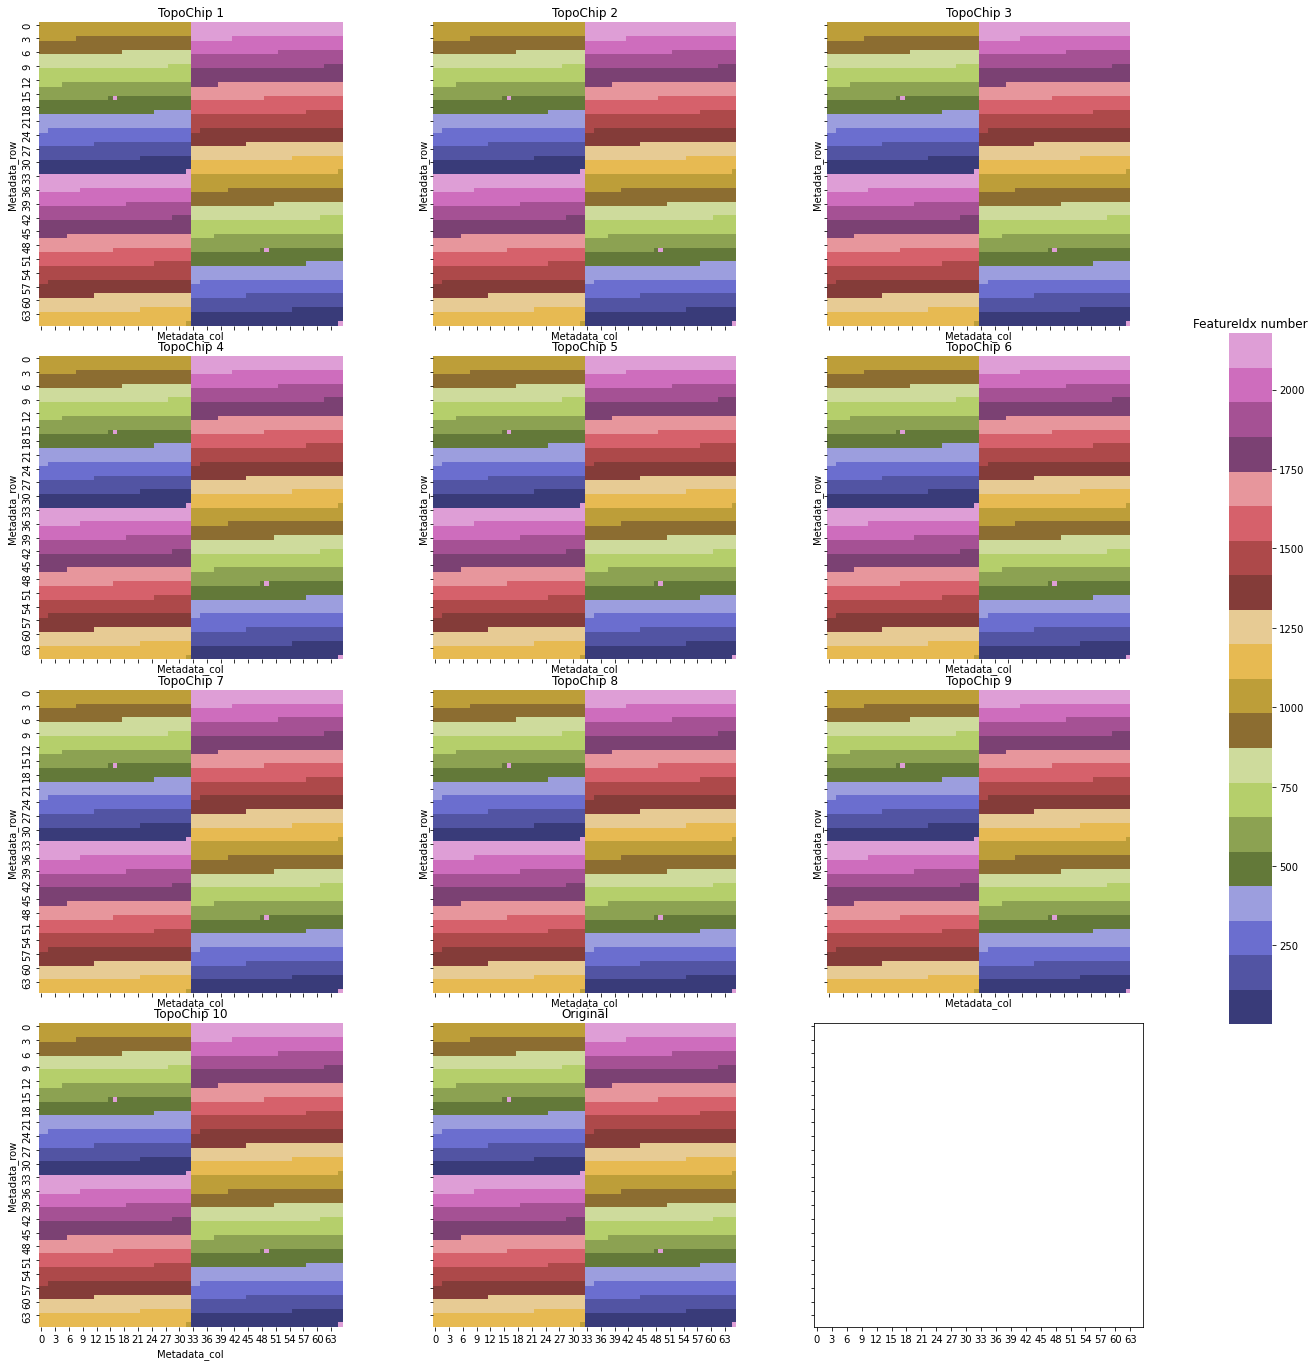

In [11]:
if ('Metadata_Plate' in rawImagedataWithFI.columns) and ('Metadata_Chip' not in rawImagedataWithFI.columns):
    rawImagedataWithFI['Metadata_Chip'] = rawImagedataWithFI['Metadata_Plate']
if rotationNeeded=="YES":
    vizFeatureIdxOnChip(originalMap=topochipMap, 
                    rotatedMap=topochipMap_rot, 
                    screenData=rawImagedataWithFI,
                    cmap="tab20b")# specify desired colormap
else:
        vizFeatureIdxOnChip(originalMap=topochipMap, 
                    rotatedMap=pd.DataFrame(),     # cannot specify None
                    screenData=rawImagedataWithFI,
                    cmap="tab20b")# specify desired colormap

#### 4.0 save the data

4.1 save the data, modify if nesessary variable that need to be saved

In [12]:
# Outputs are saved to the same folder /DataAnalysis/
rawImagedataWithFI.to_csv("Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/DataAnalysis/imageWithFIdx.csv",sep=',', index=False)

In [3]:
os.getcwd()

'C:\\Users\\20212358\\NK_Marta_podocyte_anaysis'